### Shapley value analysis


In [1]:
# %%
import shap
import time
import os
import sys
from pathlib import Path
import bainite_boundaries
project_root = os.path.abspath(Path(str(bainite_boundaries.PROJECT_ROOT), 'bainite_boundaries', 'bainite_boundaries'))

# Add `bainite_boundaries` to sys.path if it’s not already present
if project_root not in sys.path:
    sys.path.insert(0, project_root)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
if False:
    palette = sns.color_palette("deep")
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=palette)
    sns.set_context("notebook")
    sns.set_style('whitegrid')
    print(plt.style.available)
    # Remove the top and right spines
    #sns.despine()
    plt.style.use('seaborn-v0_8')
    # Optional: Customize gridlines
    plt.grid(True, which='major', linestyle='-', linewidth='0.5', color='gray')
    plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')

/home/b.schuscha/anaconda3/envs/BoundaryC/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
results_path=Path(str(bainite_boundaries.PROJECT_ROOT), 'bainite_boundaries', 'bainite_boundaries', 'results', 'shap')
which_data_list= ['Austensite','Bainite_start','Martensite_start','Bainite','Martensite_start_RA','Ferrite_critCR']
which_data=which_data_list[0]

In [3]:
# Nature journal settings
plt.rcParams.update({
    "font.size": 8,              # Font size (Nature recommends 8pt)
    "axes.labelsize": 8,         # Label size
    "axes.titlesize": 8,         # Title size
    "xtick.labelsize": 7,        # X-axis tick labels
    "ytick.labelsize": 7,        # Y-axis tick labels
    "legend.fontsize": 7,        # Legend font size
    "lines.linewidth": 1,        # Line width for plots
    "axes.linewidth": 0.8,       # Width of axes border
    "xtick.major.width": 0.8,    # Major tick width
    "ytick.major.width": 0.8,    # Major tick width
    "xtick.minor.width": 0.6,    # Minor tick width
    "ytick.minor.width": 0.6,    # Minor tick width
    "xtick.major.size": 3,       # Major tick size
    "ytick.major.size": 3,       # Major tick size
    "xtick.minor.size": 2,       # Minor tick size
    "ytick.minor.size": 2,       # Minor tick size
    "legend.frameon": False,     # No frame on legend
})

[2.2 1.8]


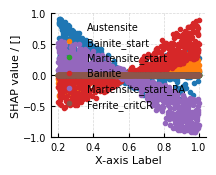

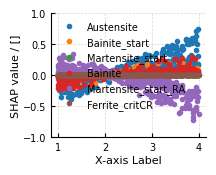

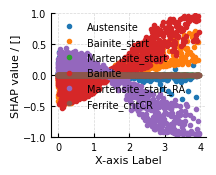

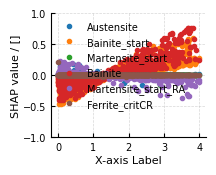

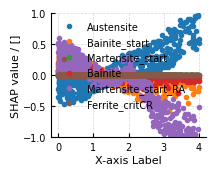

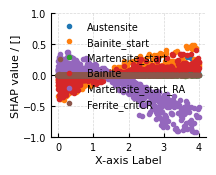

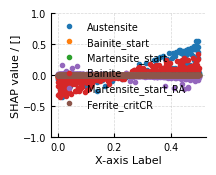

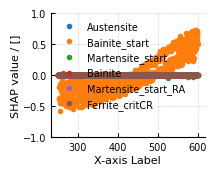

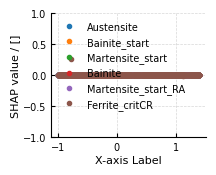

In [4]:
el_list=['X_c',	'X_si'	,'X_mn',	'X_cr',	'X_al','X_mo','X_v','X_T',r'X_$\dot{T}$']
for el in el_list:
    xel=el
    if el[0]=='X':
        yel='SHAP'+el[1:]
    else:
        yel='SHAP'+el
    fig, ax = plt.subplots(figsize=(2.2, 1.8))
    for which_data in which_data_list:
        data=pd.read_csv(results_path/(which_data+'_grid.csv'))

        ax.plot(data[xel],data[yel],'.',label=which_data)
    ax.set_ylim([-1,1])
    ax.set_xlabel("X-axis Label", labelpad=2)
    ax.set_ylabel("SHAP value / []", labelpad=2)
    ax.tick_params(direction='in', length=3, width=0.8) 
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(loc="upper left", frameon=False)
    plt.tight_layout()
print(fig.get_size_inches())

In [5]:
list_min=[0.2,1,0,0,0,0,0,250]

In [6]:
len(el_list)

9

[3.6 2.5]


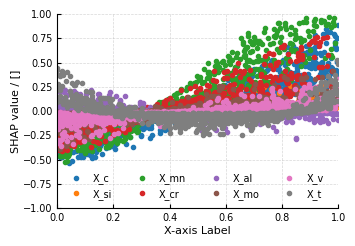

In [7]:
which_data_list= ['Bainite']
el_list=['X_c',	'X_si'	,'X_mn',	'X_cr',	'X_al','X_mo','X_v','X_t']
list_min=[0.2,1,0,0,0,0,0,250]
list_max=[1,4,4,4,4,4,0.5,600]
#el_list=['X_c',	'X_si'	,'X_mn',	'X_cr',	'X_al','X_mo','X_v']
for which_data in which_data_list:
    data=pd.read_csv(results_path/(which_data+'_grid.csv'))
    fig, ax = plt.subplots(figsize=(3.6, 2.5))

    for k,el in enumerate(el_list):
        xel=el
        if el[0]=='X':
            yel='SHAP'+el[1:]
        else:
            yel='SHAP'+el


        xx=data[xel]
        xx=(xx-list_min[k])/(list_max[k]-list_min[k])
        ax.plot(xx,data[yel],'.',label=el)
    ax.set_ylim([-1,1])
    ax.set_xlim([0,1])
    ax.set_xlabel("X-axis Label", labelpad=2)
    ax.set_ylabel("SHAP value / []", labelpad=2)
    ax.tick_params(direction='in', length=3, width=0.8) 
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(loc="best", frameon=False,ncols=4)
    plt.tight_layout()
print(fig.get_size_inches())

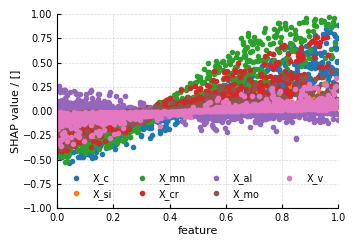

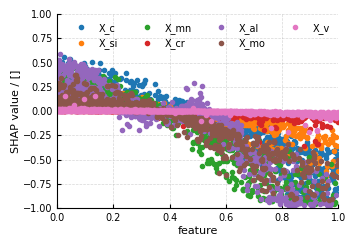

In [8]:
which_data_list= ['Bainite','Martensite_start_RA']
el_list=['X_c',	'X_si'	,'X_mn',	'X_cr',	'X_al','X_mo','X_v']
list_min=[0.2,1,0,0,0,0,0,250]
list_max=[1,4,4,4,4,4,0.5,600]
#el_list=['X_c',	'X_si'	,'X_mn',	'X_cr',	'X_al','X_mo','X_v']
for which_data in which_data_list:
    data=pd.read_csv(results_path/(which_data+'_grid.csv'))
    fig, ax = plt.subplots(figsize=(3.6, 2.5))

    for k,el in enumerate(el_list):
        xel=el
        if el[0]=='X':
            yel='SHAP'+el[1:]
        else:
            yel='SHAP'+el


        xx=data[xel]
        xx=(xx-list_min[k])/(list_max[k]-list_min[k])
        ax.plot(xx,data[yel],'.',label=el)
    ax.set_ylim([-1,1])
    ax.set_xlim([0,1])
    ax.set_xlabel("feature", labelpad=2)
    ax.set_ylabel("SHAP value / []", labelpad=2)
    ax.tick_params(direction='in', length=3, width=0.8) 
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(loc="best", frameon=False,ncols=4)
    plt.tight_layout()
    plot_path = results_path / "plots" / f"grid_{which_data}.png"
    plt.savefig(plot_path, bbox_inches='tight', dpi=300)

In [9]:
import shap
from utils.load_data import load_dataset
for which_data in which_data_list:
    nn=np.shape(data)[1]//2+1
    data=pd.read_csv(results_path/(which_data+'_train.csv'))
    col=data.columns
    data=data.to_numpy()
    x=data[:,:nn]
    y=data[:,nn:]
print(np.shape(x))
print(np.shape(y))

(1000, 12)
(1000, 10)


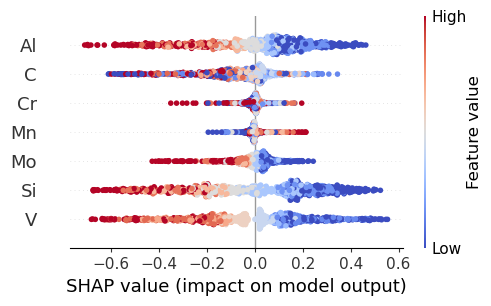

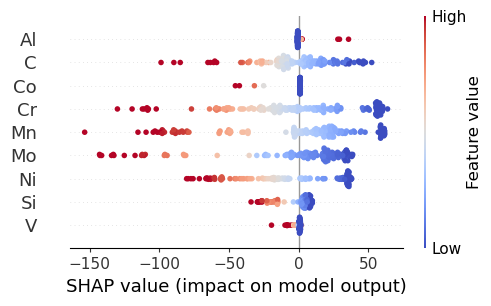

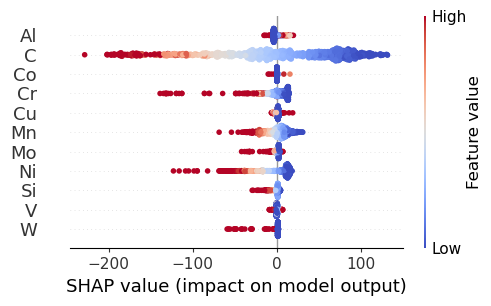

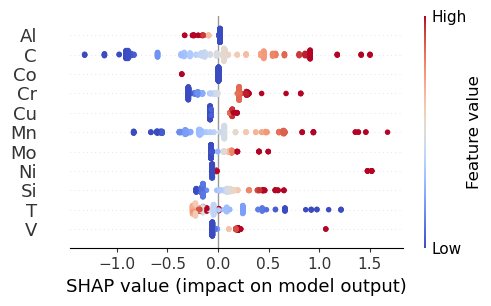

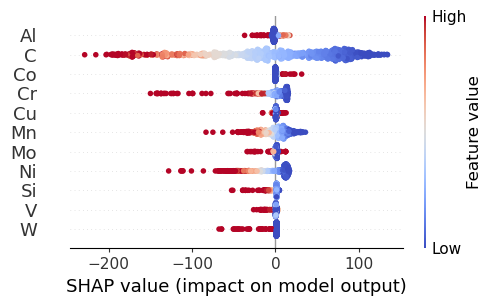

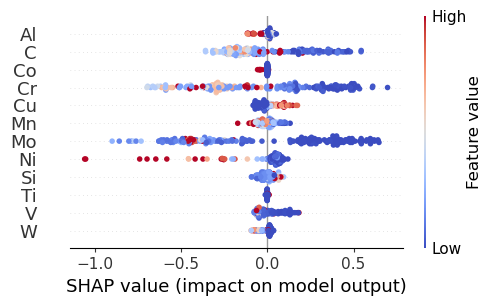

In [11]:
# Define path and models
import re 
from matplotlib import colormaps
cmap = colormaps.get_cmap('coolwarm')
results_path=Path(str(bainite_boundaries.PROJECT_ROOT), 'bainite_boundaries', 'bainite_boundaries', 'results', 'shap')
which_data_list= ['Austensite','Bainite_start','Martensite_start','Bainite','Martensite_start_RA','Ferrite_critCR']


for model in which_data_list:
    for which in ["train"]:
        # Load SHAP values
        shap_values_df = pd.read_csv(os.path.join(results_path, f"{model}_{which}.csv"))

        # Extract feature names and sort them alphabetically
        x_features = sorted([re.sub(r"^X_", "", col) for col in shap_values_df.columns if col.startswith("X_")])

        # Apply sorting order to SHAP values and X values
        shap_values_array = np.array([shap_values_df[f"SHAP_{feature}"].values for feature in x_features]).T
        x_values_array = np.array([shap_values_df[f"X_{feature}"].values for feature in x_features]).T

        # Format feature names for the plot
        x_features_plot = [f.capitalize() for f in x_features]

        # Plot summary
        shap.summary_plot(
            shap_values_array, 
            x_values_array, 
            feature_names=x_features_plot, 
            plot_size=(5, 3.1), 
            color='coolwarm', 
            cmap=cmap, 
            show=False, 
            sort=False
        )

        # Save plot
        plot_path = results_path / "plots" / f"{model}_{which}.png"
        plt.tight_layout()
        plt.savefig(plot_path, bbox_inches='tight', dpi=300)
        plt.show()